# Guassian Naive Bayes

## About
- generally performs worse than more complicated models
- provides straightforward probabilistic prediction
- is fast and efficient
- should be used a baseline classification
- very few tunable parameters, less setup time

## Example 1

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn
import numpy

In [2]:
seaborn.set(rc={'figure.figsize':(12,9)})
seaborn.set_style('whitegrid')

In [3]:
X, y = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 2,
                  random_state = 2,
                  cluster_std = 1.5)

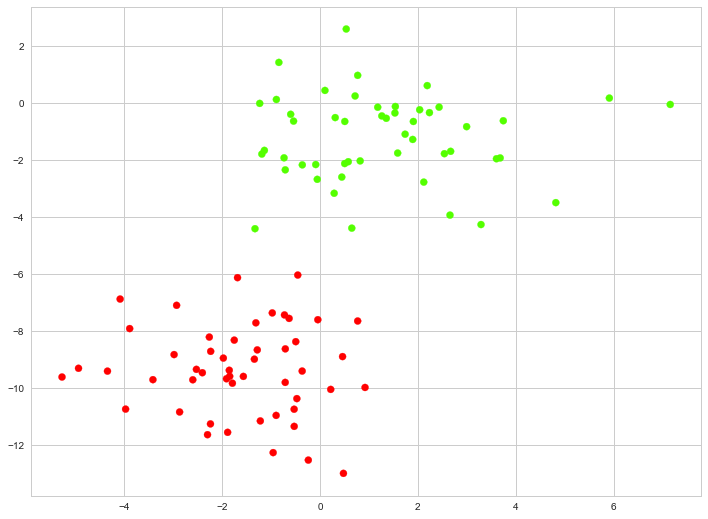

In [4]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y,
           s = 50,
           cmap = "prism")

In [5]:
from sklearn.naive_bayes import GaussianNB

In [6]:
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None)

In [7]:
rng = numpy.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

In [8]:
ynew = model.predict(Xnew)

### Guassian Naive Bayes Visualized

(-5.896362448898986,
 7.783374800445813,
 -13.783892907449408,
 3.3714029119696542)

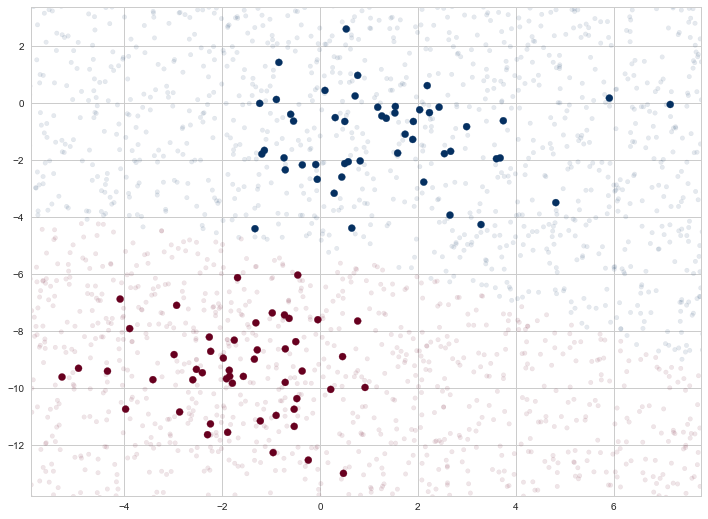

In [9]:
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "RdBu")
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c = ynew, s = 20, cmap = "RdBu", alpha = .1)
plt.axis(lim)

#The boundary for guassian NB is curved, and is often quadratic

## Text Classification Example (Multinonial Naive Bayes)

### Import sklearn text data

In [10]:
from sklearn.datasets import fetch_20newsgroups

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [12]:
data = fetch_20newsgroups()

In [13]:
type(data)

sklearn.utils.Bunch

In [14]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Select a few categories

In [15]:
selected_categories = ['comp.graphics',
                       'talk.politics.guns',
                       'sci.space',
                        'rec.autos', 
                       'rec.sport.baseball', 
                       'rec.sport.hockey']

### Create train and test data, there is more train data than there is test data

In [16]:
train = fetch_20newsgroups(subset = "train", categories=selected_categories)
test = fetch_20newsgroups(subset = "test", categories=selected_categories)

In [17]:
len(train.data)

3514

In [18]:
len(test.data)

2339

In [36]:
print(train.data[8])

From: ajg1678@ritvax.isc.rit.edu
Subject: Re: Buick heater controls
Nntp-Posting-Host: vaxa.isc.rit.edu
Reply-To: ajg1678@ritvax.isc.rit.edu
Organization: Rochester Institute of Technology
Distribution: usa
Lines: 1

I had the exactly same problem with my '70 Lesabre. It was also from Cal.     What I did was go to the local junkyard and pick up a diaphragm from a '68      Lesabre with the same heater set up.  It worked for me, but a little bit slow   to change from vents to defogger.  Better than nothing!



In [38]:
print(train.target[8])

1


### Create a pipeline to make the data usable for naive bayes

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [20]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [21]:
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
labels = model.predict(test.data)

In [23]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test.target, labels)

Text(178.18,0.5,'PREDICTED LABEL')

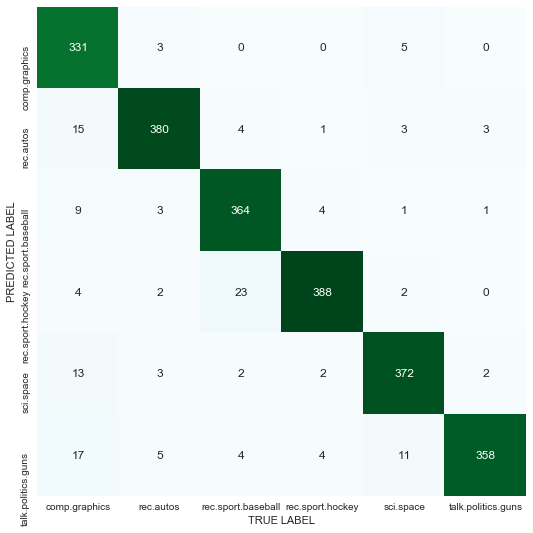

In [30]:
seaborn.heatmap(matrix.T, 
                square = True, 
                annot = True,
                fmt = "d", 
                cbar = False, 
                cmap = "BuGn",
               xticklabels = train.target_names, 
                yticklabels = train.target_names)

plt.xlabel("TRUE LABEL")
plt.ylabel("PREDICTED LABEL")